In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pylab as plt
from collections import OrderedDict
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sns

# Functions

In [2]:
def histograms_PLOT(feature):
    '''
    Plot histograms of a feature
    '''
    #Plot train and predictions
    plt.figure()
    amin = min(feature)
    amax = max(feature)
    arange = (amax-amin)/0.05
    print arange
    n1, bins1, patches1 = plt.hist(feature, int(arange), histtype='bar',color='b',label='Train',normed=True)

    #plt.xlim([0,500])
    #plt.legend()
    plt.xlabel('Log (SalesPrice)')
    #plt.title('R-squ score:{}'.format(round(score,2)))
    return n1,bins1

In [3]:
#Convert  feature into numerical value
def seq(x):
    if (x == 'M') or (x == 1):
        x = 1
    elif (x == 'F') or (x == 0):
        x = 0
    else:
        print 'Geneder non binary'
    return x

# Load data

In [4]:
#Read the data set
df = pd.read_csv('data/raw/train.csv', dtype = {'Id' : np.str})
df_test = pd.read_csv('data/raw/test.csv', dtype = {'Id' : np.str})


In [5]:
print len(df)
df.head()
df_test.head()

1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Scubing the data

In [24]:
#Replace NaN values with strings
df['Alley'] = df['Alley'].replace('NA', 'NoAlley', inplace=True)
df_test['Alley'] = df_test['Alley'].replace('NA', 'NoAlley', inplace=True)
df['BsmtQual'] = df['BsmtQual'].replace('NA', 'NB', inplace=True)
df_test['BsmtQual'] = df_test['BsmtQual'].replace('NA', 'NB', inplace=True)
df['BsmtCond'] = df['BsmtCond'].replace('NA', 'NB', inplace=True)
df_test['BsmtCond'] = df_test['BsmtCond'].replace('NA', 'NB', inplace=True)
df['BsmtExposure'] = df['BsmtExposure'].replace('NA', 'NB', inplace=True)
df_test['BsmtExposure'] = df_test['BsmtExposure'].replace('NA', 'NB', inplace=True)
df['BsmtFinType1'] = df['BsmtFinType1'].replace('NA', 'NB', inplace=True)
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].replace('NA', 'NB', inplace=True)
df['BsmtFinType2'] = df['BsmtFinType2'].replace('NA', 'NB', inplace=True)
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].replace('NA', 'NB', inplace=True)
df['FireplaceQu'] = df['FireplaceQu'].replace('NA', 'NF', inplace=True)
df_test['FireplaceQu'] = df_test['FireplaceQu'].replace('NA', 'NF', inplace=True)
df['GarageType'] = df['GarageType'].replace('NA', 'NG', inplace=True)
df_test['GarageType'] = df_test['GarageType'].replace('NA', 'NG', inplace=True)
df['GarageFinish'] = df['GarageFinish'].replace('NA', 'NG', inplace=True)
df_test['GarageFinish'] = df_test['GarageFinish'].replace('NA', 'NG', inplace=True)
df['GarageQual'] = df['GarageQual'].replace('NA', 'NG', inplace=True)
df_test['GarageQual'] = df_test['GarageQual'].replace('NA', 'NG', inplace=True)
df['GarageCond'] = df['GarageCond'].replace('NA', 'NG', inplace=True)
df_test['GarageCond'] = df_test['GarageCond'].replace('NA', 'NG', inplace=True)
df['PoolQC'] = df['PoolQC'].replace('NA', 'NP', inplace=True)
df_test['PoolQC'] = df_test['PoolQC'].replace('NA', 'NP', inplace=True)
df['Fence'] = df['Fence'].replace('NA', 'NF', inplace=True)
df_test['Fence'] = df_test['Fence'].replace('NA', 'NF', inplace=True)
df['MiscFeature'] = df['MiscFeature'].replace('NA', 'NoF', inplace=True)
df_test['MiscFeature'] = df_test['MiscFeature'].replace('NA', 'NoF', inplace=True)

In [6]:
#extract only numerical data and save to a seperate CSV
df_numeric = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:]#.corr()
df_numeric.to_csv('data/processed/train_numeric.csv')

df_numeric_test = df_test.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:]#.corr()
df_numeric_test.to_csv('data/processed/test_numeric.csv')

df_numeric_test.head()


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [63]:
#filter data by hi corralation features 
hi_cor_dict = {}

for i in cor_dict:
    if cor_dict[i] >= 0.5:
        hi_cor_dict[i] = cor_dict[i]
        
#Sort features to ensure SalePrice goes last
hi_cor_dict = OrderedDict(sorted(hi_cor_dict.items(), key=lambda x: x[1]))
hi_corr_columns = hi_cor_dict.keys()

#extract only numerical data and save to a seperate CSV
df_hi_corr = df[hi_corr_columns]
df_hi_corr.to_csv('data/processed/train_hi_corr.csv')

del hi_cor_dict['SalePrice']
hi_corr_columns = hi_cor_dict.keys()

df_hi_corr_test = df_test[hi_corr_columns]
df_hi_corr_test.to_csv('data/processed/test_hi_corr.csv')

df_hi_corr.head()



,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000


# Visualise

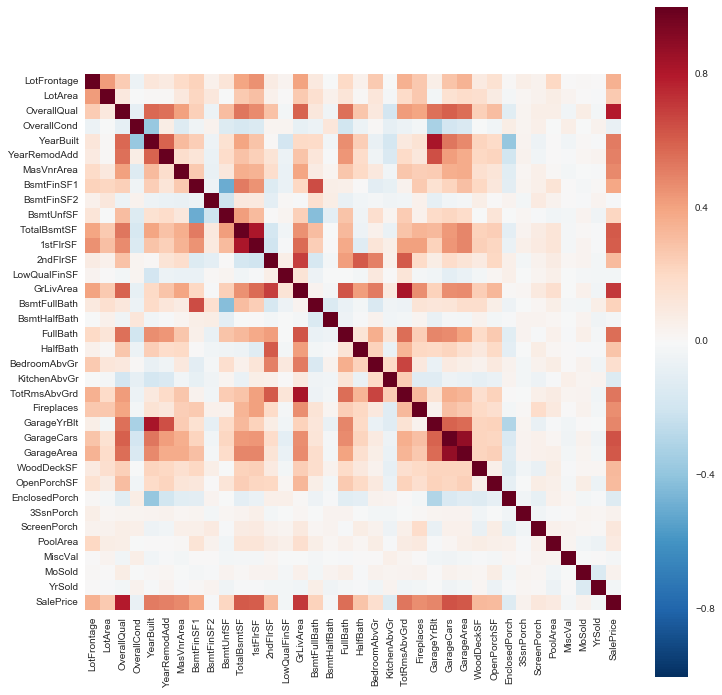

In [30]:
#Calculate the 'pearson' corralation coefficent between the features and plot as a heat map
corralated = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
#
sns.heatmap(corralated, vmax=1, square=True)

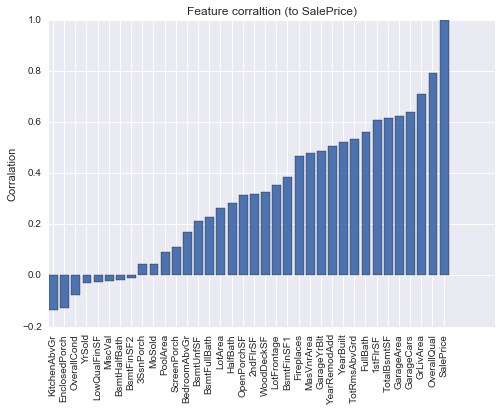

In [45]:
#Visulaise feature corralation
cor_dict = corralated['SalePrice'].to_dict()
cor_dict = OrderedDict(sorted(cor_dict.items(), key=lambda x: x[1]))

plt.figure()

N = len(cor_dict.values())
ind = np.arange(N)
w = 0.35

y = cor_dict.values()
x = cor_dict.keys()

plt.bar(ind,y)

plt.title('Feature corraltion (to SalePrice)')
plt.ylabel('Corralation')
plt.xticks(ind+w,x,rotation='vertical')



plt.show()



{'1stFlrSF': 0.6058521846919166, 'FullBath': 0.5606637627484452, 'OverallQual': 0.79098160058380473, 'TotalBsmtSF': 0.61358055155919444, 'SalePrice': 1.0, 'GarageArea': 0.62343143891835984, 'TotRmsAbvGrd': 0.53372315558202377, 'GarageCars': 0.64040919725834899, 'YearBuilt': 0.52289733287949669, 'GrLivArea': 0.70862447761265113, 'YearRemodAdd': 0.50710096711138675}


26.7024304934


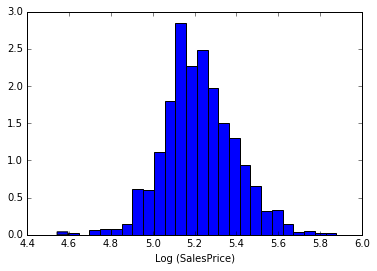

In [46]:
n,b = histograms_PLOT(df.SalePrice.apply(np.log10))

In [52]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
